### Import library and dataset ###

In [1]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the data on CustomerID to get both customer and transaction information
data = pd.merge(transactions, customers, on='CustomerID', how='left')


In [2]:
# Feature Engineering: Aggregate transaction data
customer_features = data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()

# Merge customer demographics (e.g., region)
customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID', how='left')


### Elbow method ###

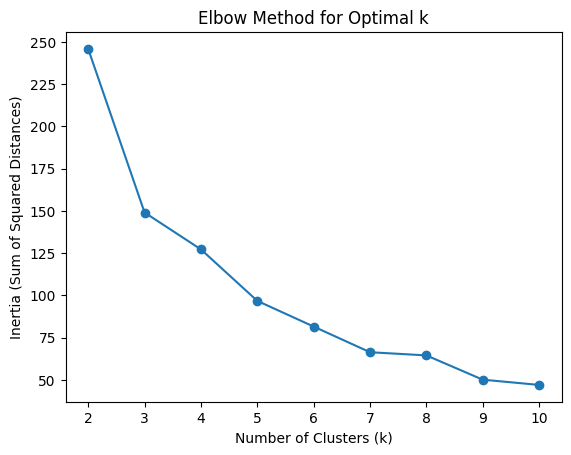

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features for clustering
scaler = StandardScaler()
features = customer_features[['total_spend', 'transaction_count', 'unique_products']].values
scaled_features = scaler.fit_transform(features)

# Range of k values to try
k_range = range(2, 11)

# List to store inertia values
inertia_values = []

# Loop through k values and calculate inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against k
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


### K-Means Clustering ###

In [7]:
# Assuming optimal k from the Elbow Method is 4
optimal_k = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Check the clusters
print(customer_features.head())


  CustomerID  total_spend  transaction_count  unique_products         Region  \
0      C0001      3354.52                  5                5  South America   
1      C0002      1862.74                  4                4           Asia   
2      C0003      2725.38                  4                4  South America   
3      C0004      5354.88                  8                8  South America   
4      C0005      2034.24                  3                3           Asia   

   Cluster  
0        2  
1        1  
2        2  
3        3  
4        1  


In [8]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Calculate Silhouette Score
sil_score = silhouette_score(scaled_features, customer_features['Cluster'])
print(f'Silhouette Score: {sil_score}')


Davies-Bouldin Index: 0.9182221873822775
Silhouette Score: 0.37437823947162235


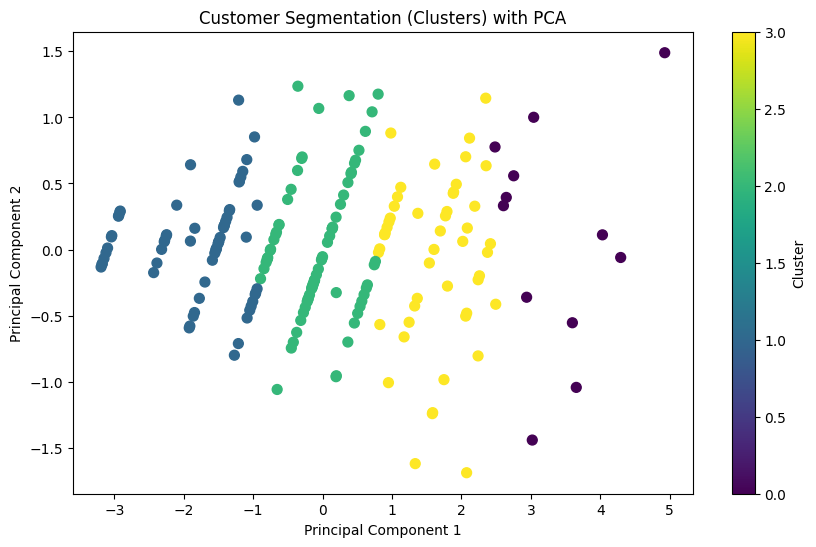

In [9]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_features['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation (Clusters) with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
